In [179]:
#Trying to extract
#-monthly spend by client: a function which calls monthly spend by the client input
#-monthly spend by publisher: a function which calls monthly spend by the publisher input

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
pub = pd.read_csv("..\..\..\publisher_0116_0217.csv")

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
pub = pub.drop(pub.index[12830980:])

In [25]:
pub = pub.drop(['Advertiser ID', 'Advertiser Status', 'Advertiser Integration Code', 'App/URL ID'], 1)

In [26]:
pub.columns

Index(['Month', 'Advertiser', 'App/URL', 'Public Inventory',
       'Advertiser Currency', 'Impressions', 'Clicks',
       'Revenue (Adv Currency)'],
      dtype='object')

In [27]:
pub.columns = ['Month', 'Advertiser', 'URL', 'PublicInventory', 'Currency', 'Impressions', 'Clicks', 'Spend']

In [45]:
pub.Advertiser = pub.Advertiser.astype("category")

In [281]:
pub["AdvertiserName"] = (pub.Advertiser.str.split("_").str[0]).lower()

AttributeError: 'Series' object has no attribute 'lower'

In [178]:
month = np.unique(pub.Month)

In [61]:
ebay = pub[(pub.URL.str.contains("ebay.co.uk")) | (pub.URL.str.contains("ebay.com"))]

In [129]:
pub.head()

,Month,Advertiser,URL,PublicInventory,Currency,Impressions,Clicks,Spend,AdvertiserName
0,2016/01,CarphoneWarehouse2_UK_Blue449,recipes.in,Yes,GBP,79.0,0.0,0.045726,CarphoneWarehouse2
1,2016/01,CarphoneWarehouse2_UK_Blue449,red-brolly.com,Yes,GBP,12.0,0.0,0.005061,CarphoneWarehouse2
2,2016/01,CarphoneWarehouse2_UK_Blue449,s1006.photobucket.com,Yes,GBP,1.0,0.0,0.005649,CarphoneWarehouse2
3,2016/01,CarphoneWarehouse2_UK_Blue449,seniorhealth.about.com,Yes,GBP,72.0,0.0,0.111920,CarphoneWarehouse2
4,2016/01,CarphoneWarehouse2_UK_Blue449,skinnykitchen.com,Yes,GBP,258.0,0.0,0.254953,CarphoneWarehouse2


In [65]:
pub[pub.AdvertiserName == "Aviva"].pivot_table(index="Month", values="Spend", aggfunc=np.sum)

Month
2016/01    122978.467319
2016/02    106555.997821
2016/03    151785.835684
2016/04    161006.439318
2016/05    124073.372243
2016/06    122472.885110
2016/07     93732.587367
2016/08    139971.654078
2016/09    203190.505641
2016/10    261872.881402
2016/11    189533.327129
2016/12     53492.634845
2017/01    106525.506839
2017/02     90761.899515
Name: Spend, dtype: float64

In [122]:
def spend(x):
    y = pub[pub.AdvertiserName == x].pivot_table(index="Month", values="Spend", aggfunc=np.sum)
    print(y)

In [276]:
def clientSpend(x):
    g = pub[pub.AdvertiserName == x].pivot_table(index="Month", values=["Spend", "Impressions"], aggfunc=np.sum)
    month = np.unique(pub[pub.AdvertiserName == x].Month)
    f, ax = plt.subplots(1, 1, figsize=[20, 5])
    chart = sns.barplot(data=g, x=month, y="Spend")
    chart.set_xticklabels(month, rotation=75)

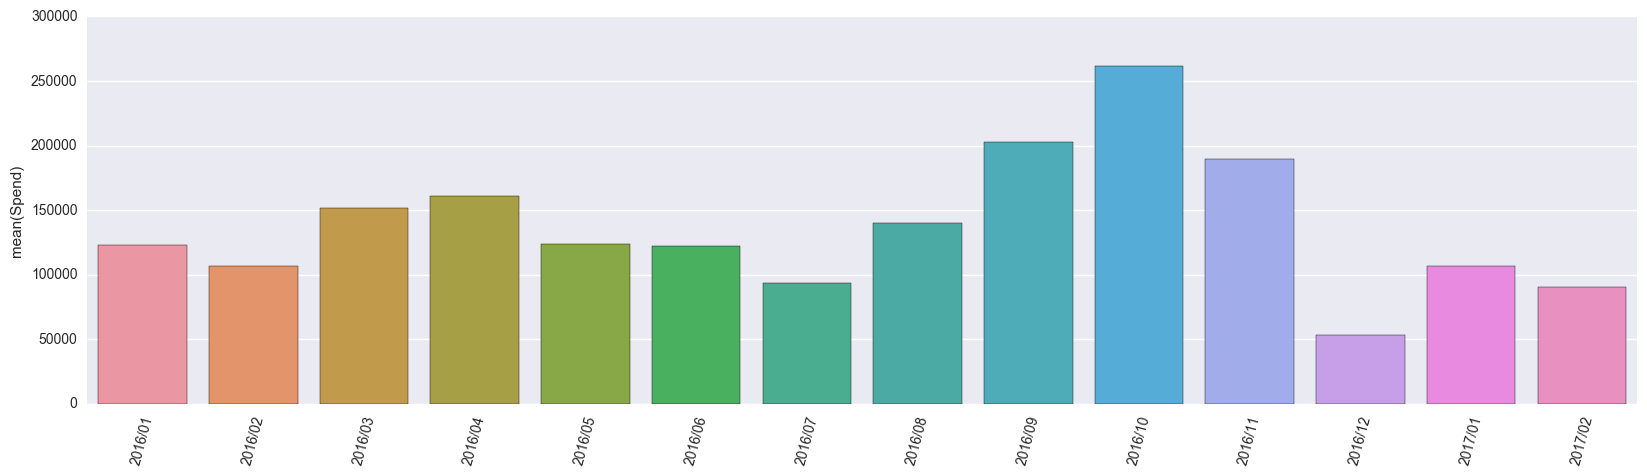

In [183]:
clientSpend("Aviva")

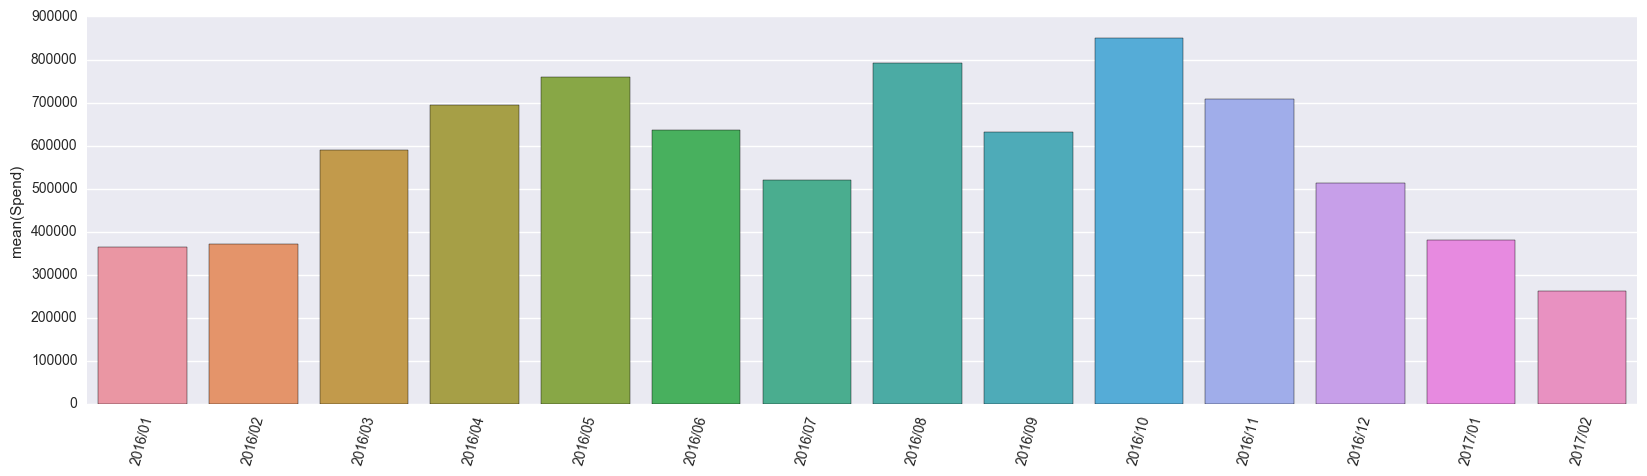

In [210]:
clientSpend("Next")

In [221]:
def clientSpend_1(x):
    f, ax = plt.subplots(len(x), 1, figsize=[20, 5])
    i = 0
    for x in x:
        g = pub[pub.AdvertiserName == x].pivot_table(index="Month", values=["Spend", "Impressions"], aggfunc=np.sum)
        month = np.unique(pub.Month)
        chart = sns.barplot(data=g, x=month, y="Spend", ax=ax[i])
        chart.set_xticklabels(month, rotation=75)
        i = i + 1

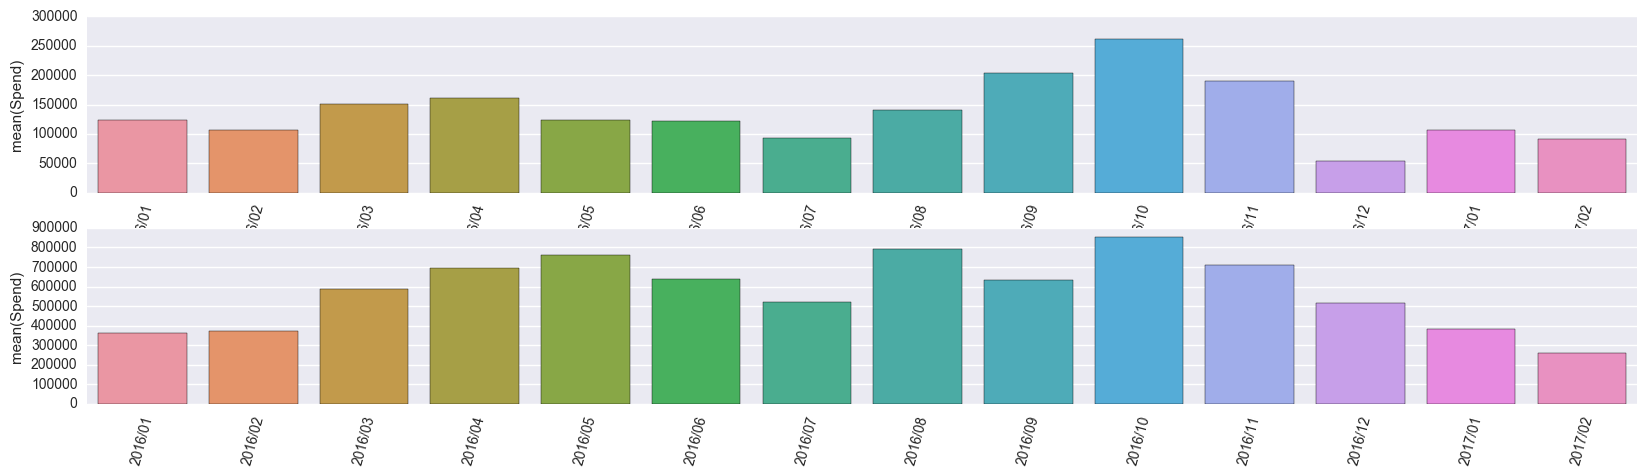

In [222]:
clientSpend_1(["Aviva", "Next"])

In [268]:
def publisherSpend(x):
    g = pub[(pub.URL.str.contains(x+".co.uk")) | (pub.URL.str.contains(x+".com"))].pivot_table(
        index="Month", values=["Spend", "Impressions"], aggfunc=np.sum)
    month = np.unique(pub[pub.AdvertiserName == x].Month)
    f, ax = plt.subplots(1, 1, figsize=[20, 5])
    chart = sns.barplot(data=g, x=month, y="Spend", ax=ax)
    chart.set_xticklabels(month, rotation=75)
    print( x, "total spend from", month[0], "to", month[-1], "is:", 
          np.sum(pub[(pub.URL.str.contains(x+".co.uk")) | (pub.URL.str.contains(x+".com"))].Spend))

ebay total spend from 2016/01 to 2017/02 is: 2539808.875092003


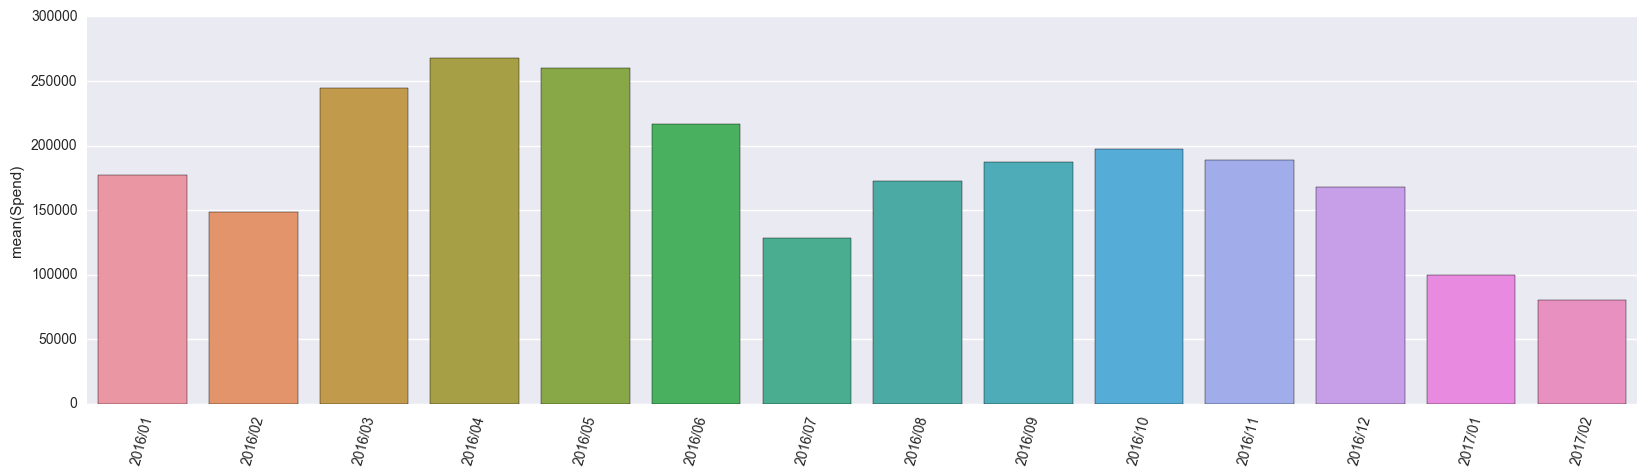

In [263]:
publisherSpend("ebay")

In [245]:
np.sum(pub[(pub.URL.str.contains("ebay.co.uk")) | (pub.URL.str.contains("ebay.com"))].Spend)

2539808.875092003

theguardian total spend from 2016/01 to 2017/02 is: 408629.7137500002


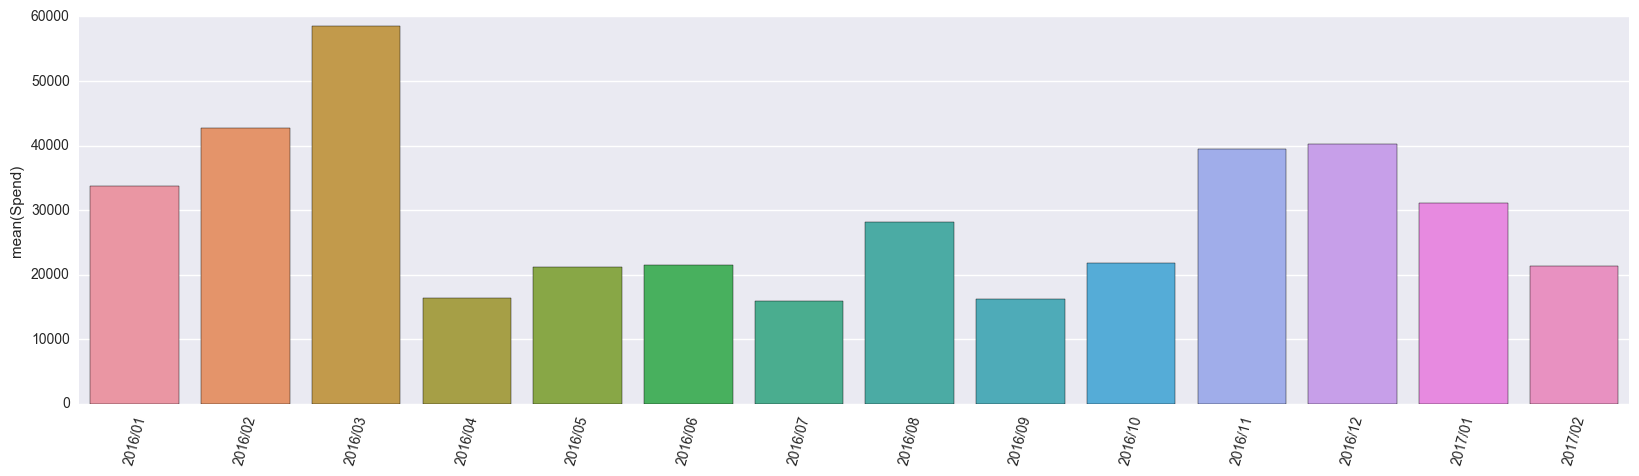

In [264]:
publisherSpend("theguardian")

ebay total spend from 2016/01 to 2017/02 is: 2539808.875092003


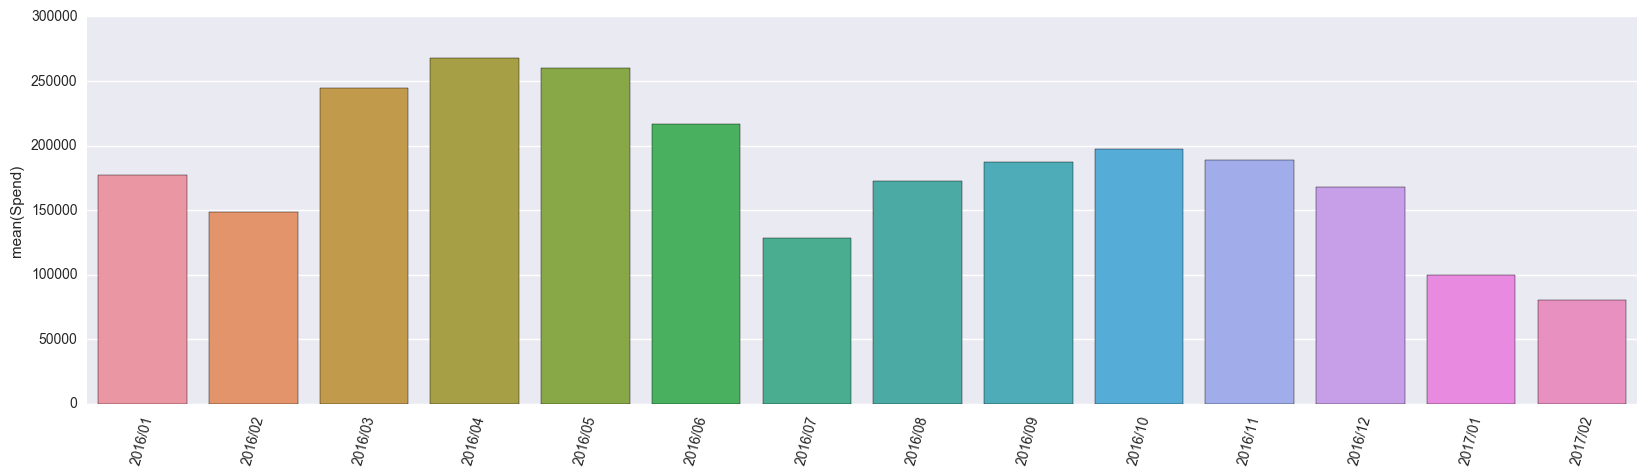

In [265]:
publisherSpend("ebay")

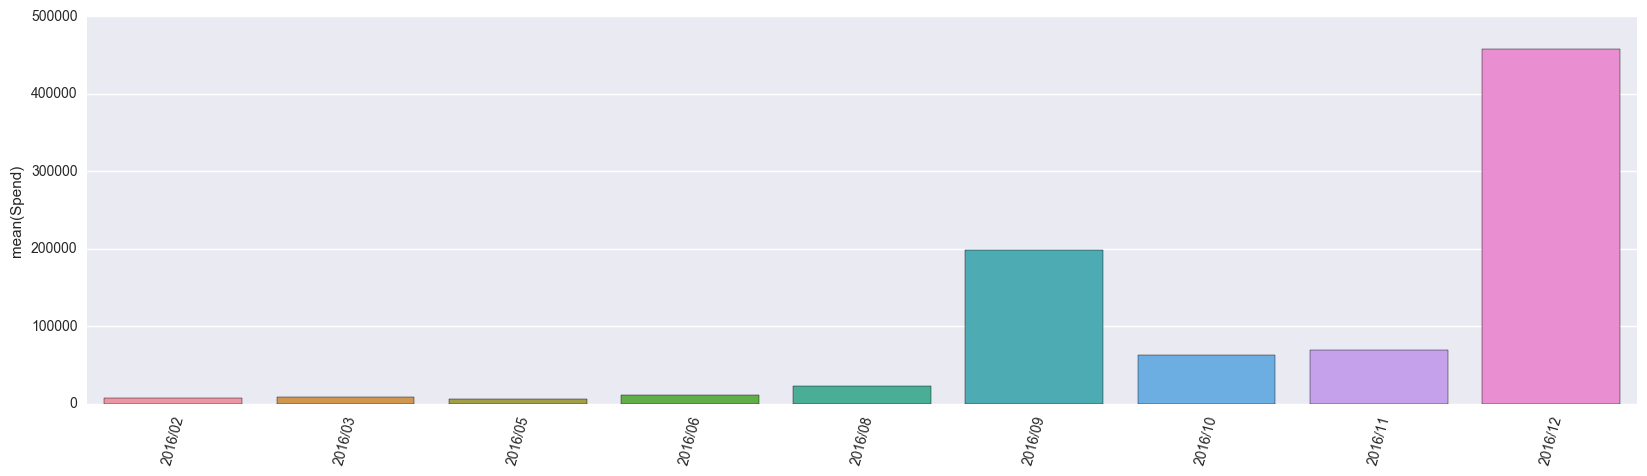

In [280]:
clientSpend("ACER")

In [274]:
np.unique(pub[pub.AdvertiserName == "CarphoneWarehouse2"].Month)

array(['2016/01', '2016/02', '2016/03', '2016/04'], dtype=object)

In [279]:
np.unique(pub.AdvertiserName)

array(['ACER', 'ACER USD', 'Aer', 'Alexander McQueen', 'Aurum', 'Aviva',
       'Avon BAR', 'BBC Store', 'Birds Eye', 'Birkenstock', 'BlueCross',
       'Boots', 'Bottega Veneta', 'Bottega Veneta (Non-DCM)', 'Calor Gas',
       'Calor Gas-NON DFA', 'CarphoneWarehouse2', 'Centerparcs',
       'Christies', 'Cineworld', 'Citizen', 'Costa', 'Coty',
       'Creative Content', 'DMU', 'DSG', 'David Lloyd', 'Delta Airline',
       'Disney Worldwide', 'Disneyland', 'Dixons', 'Doddle', 'Dreams',
       'Dunhill', 'EastMidlandsTrains', 'Ekabe', 'Elemis',
       'Entertainment One', 'Flybe', 'FoxInternational', 'Fred Perry',
       'Gucci', 'Haribo', 'Harvey Nichols', 'Helly Hansen', 'HomeAway',
       'Honda', 'Hästens', 'IAMS', 'International Watch Company',
       'Jaeger LeCoultre', 'John Frieda', 'KFC', 'Ladbrokes', 'Lexus',
       'Lexus (Non DFA)', 'Lexus Pan Euro', 'Lidl', 'Lombard', 'MOHG',
       'Maxxium', 'Mercedes-Benz', 'Merial', 'Molson Coors', 'Mont Blanc',
       'NAS', 'National 

In [284]:
ggg = "HSGSADKAD"

'hsgsadkad'

In [ ]:
pub.Advertiser.str.lower()